# Lesson I 

## Introduction to other file Types

In this chapter, we will learn how to import :

* Excel Spreadsheets
* MATLAB files
* SAS Files
* Stata Files
* HDF5 Files

Another File type we'll learn about in this Chapter is that of a **'pickled'** file.

### Pickled Files

* File type native to Python
* Motivation: many datatypes for which it isn't obvious how to store them
* Pickled files are serialized
* Serialize = convert object to bytestream

As we've done before, when opening a such file, we'll want to specify that it is read only: We'll also want to specify that it is a binary file. To specify both read only and binary, we'll wanto to pass the string ```'rb'``` as the second argument of ```open```.

```python
import pickle
with open('pickled_fruit.pkl', 'rb') as file:
    data = pickle.load(file)

print(data)    
```

### Excel Spreadsheets

An Excel file generally consists of a number of sheets. There are many ways to import Excel Files and we'll use **pandas** to do so because it produces dataframes *natively*.

```python
import pandas as pd
file = 'urbanpop.xlsx'
data = pd.ExcelFile(file)
print(data.sheet_names)

'''
['1960-1966', '1967-1974', '1975-2011']
'''

df1 = data.parse('1960-1966') # sheet name, as a string
df2 = data.parse(0) # sheet index, as a float
```

We'll also learn:

* How to customize your import
* Skip rows
* Import certain columns
* Change column names

# Exercise

## Listing Sheets in Excel Files

Whether you like it or not, any working data scientist will need to deal with Excel spreadsheets at some point in time. You won't always want to do so in Excel, however!

Here, you'll learn how to use ```pandas``` to import Excel spreadsheets and how to list the names of the sheets in any loaded .xlsx file.

Recall from the video that, given an Excel file imported into a variable ```spreadsheet```, you can retrieve a list of the sheet names using the attribute ```spreadsheet.sheet_names```.

Specifically, you'll be loading and checking out the spreadsheet ```'battledeath.xlsx'```, modified from the Peace Research Institute Oslo's (PRIO) [dataset](https://www.prio.org/data). This data contains age-adjusted mortality rates due to war in various countries over several years.


In [3]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'datasets/battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# print sheet names
print(xls.sheet_names)

['2002', '2004']


## Importing sheets from Excel Files

In the previous exercises, you saw that the Excel file contains two sheets, ```'2002'``` and ```'2004'```. The next step is to import these.

In this exercise, you'll learn how to import any given sheet of your loaded .xlsx file as a *DataFrame*. You'll be able to do so by specifying either the sheet's name or its index.

The spreadsheet ```'battledeath.xlsx'``` is already loaded as ```xls```.

In [4]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xls.parse(0)

# Print the head of the DataFrame df2
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


## Customizing your Spreadsheet

Here, you'll parse your spreadsheets and use additional arguments to skip rows, rename columns and select only particular columns.

The spreadsheet ```'battledeath.xlsx'``` is already loaded as ```xls```.

As before, you'll use the method ```parse()```. This time, however, you'll add the additional arguments ```skiprows```, ```names``` and ```usecols```. These skip rows, name the columns and designate which columns to parse, respectively. All these arguments can be assigned to lists containing the specific row numbers, strings and column numbers, as appropriate.


In [5]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


# Lesson II

## Importing SAS/Stata files using Pandas

There are many statistical software packages out there and, although you may not need to do so all the time, it will be important for us, to be able to import these files into your Python environment.

### SAS and Stata files

| SAS Files | Stata Files |
| ----------|-------------|
| Statistical Analysis System | "Statistics" + "data" |
| Business analytics and biostatistics | Academic social sciences research |

**SAS files** 
* used for:
    - Advanced analytics
    - Multivariate analysis
    - Business intelligence
    - Data Management
    - Predictive analytics
    - Standart for computational analysis
    

Most common SAS files have extansion: 
* ```.sas7bdat``` : Dataset files 
* ```.sas7bcat``` : Catalog files

```python
import pandas as pd
from sas7bdat import SAS7BDAT
with SAS7BDAT('urbanpop.sas7bdat') as file:
    df_sas = file.to_data_frame()
```

**Stata Files**
* Have extension ```.dta```

We can import them using pandas. We don't even need to initialize a context manager in this case! We merely pass the filename to the function ```read_stata``` and assign it to a variable.

```python
import pandas as pd
data = pd.read_stata('urbanpop.dta')
```

# Exercise

## Importing SAS files

In this exercise, you'll figure out how to import a SAS file as a DataFrame using ```SAS7BDAT``` and ```pandas```. The file ```'sales.sas7bdat'``` is already in your working directory.

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


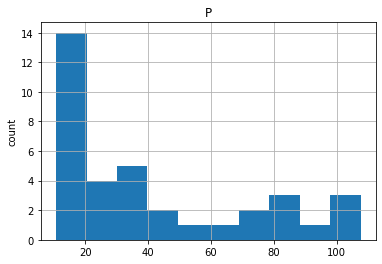

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('datasets/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()
    
# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

## Importing Stata files

Here, you'll gain expertise in importing Stata files as DataFrames using the ```pd.read_stata()``` function from ```pandas```. ```'disarea.dta'```, is still in your working directory.

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0

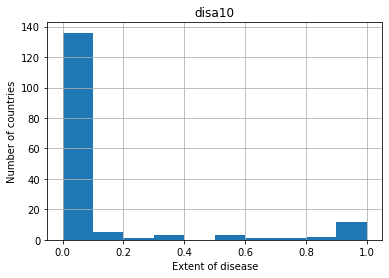

In [7]:
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('datasets/disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()

# Lesson III

## Importing HDF5 files

According to the 2013 O'Reilly book Python and HDF5 by Andrew Collette,

> " In the Python world, consensus is rapidly converging on Hierarchical Data Format version 5, or 'HDF5', as the standart mechanism for storing large quantities of numerical data."

**HDF5 files:**
* Hierarchical Data Format Version 5
* Standart for storing large quantities of numerical data
* Datasets can be hundreds of gigabytes or terabytes
* HDF5 can scale to exabytes

### Importing HDF5 Files

First import the package **h5py** and them import the file using ```"h5py.file"```. Remember to use 'r' in order to specify read only. Printing the Datatype to the shell reveals that we are dealining with an h5py file.

In [9]:
import h5py
filename='datasets/L-L1_LOSC_4_V1-1126259446-32.hdf5 '
data = h5py.File(filename, 'r') # 'r' is for read
print(type(data))

<class 'h5py._hl.files.File'>


### The Structure of HDF5 files

What is the structure of this file? We can explore it's hierarchical structure as we would that of a Python dictionary uusing method ```keys()```.

In [10]:
for key in data.keys():
    print(key)

meta
quality
strain


We see that there are three keys:
* meta : Meta-data for the file
* quality : Refers to data quality.
* strain : Strain data from the interferometer

each of these is an HDF group we can think of these groups as directories.


In [11]:
print(type(data['strain']))

<class 'h5py._hl.group.Group'>



If you knew what data and metadata should be in each group, you could access it straightforwardly. However, if not, due to hierarchical nature of the file structure, it is easy to explore.

In [12]:
for key in data['meta'].keys():
    print(key)

Description
DescriptionURL
Detector
Duration
GPSstart
Observatory
Type
UTCstart


Let's say we wanted to find out what type of metadata there is, we could easily print out the keys. Now we know the keys, we can access any metadata of interest.

If we are interested in *'Description'* and *'Detector'*, we can pass these keys to the ```numpy.array()``` function to convert the values to a *NumPy array*.

In [14]:
import numpy as np

print(np.array(data['meta']['Description'])), np.array(data['meta']['Detector'])

b'Strain data time series from LIGO'


(None, array(b'L1', dtype='|S2'))

# Exercise

## Extracting data from your HDF5 file

In this exercise, you'll extract some of the LIGO experiment's actual data from the HDF5 file and you'll visualize it.

To do so, you'll need to first explore the HDF5 group ```'strain'```.

Strain


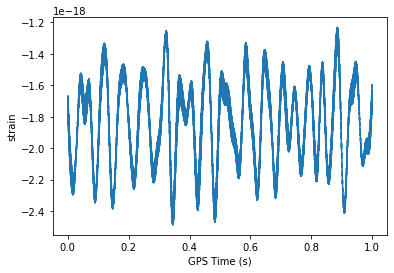

In [15]:
# get the HDF5 group : group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)
    
# Set variable equal to time series data: strain
strain = np.array(data['strain']['Strain'])

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()    